**MNIST image classification**
Classifying the MNIST images using Keras

Importing dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# shape of numpy arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
# print the 10th image

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


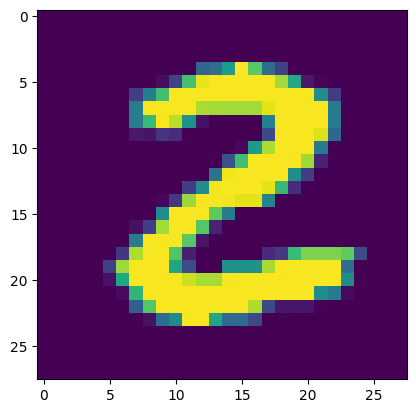

2


In [ ]:
# display the image

plt.imshow(x_train[25])
plt.show()

print(y_train[25])

Image Labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# scaling the values

x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the neural network

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8582 - loss: 0.4972
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9543 - loss: 0.1524
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9749 - loss: 0.0851
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9788 - loss: 0.0682
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9830 - loss: 0.0561
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0469
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9885 - loss: 0.0392
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9895 - loss: 0.0350
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0307


Training data accuracy is 98.9%

## **Accuracy of test data**

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

print("Test loss:",loss)
print("Test accuracy:",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9711 - loss: 0.1219
Test loss: 0.10397475957870483
Test accuracy: 0.9749000072479248


Test data accuracy is 95.6%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


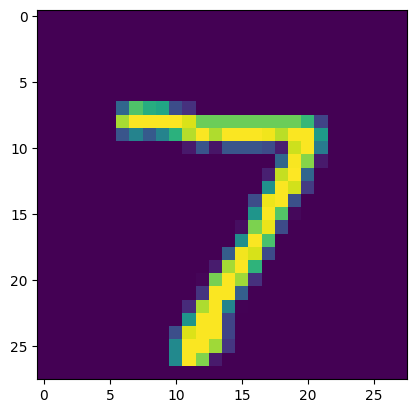

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([7.1460634e-02, 1.5525097e-01, 7.5491470e-01, 9.6738404e-01,
       7.3821531e-05, 8.3068490e-02, 1.9858186e-12, 9.9999994e-01,
       3.8079116e-02, 9.1236103e-01], dtype=float32)

model.predict() gives prediction probability for that data point


In [ ]:
# converting predition probability to class label

label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting prediction probabilty for all datapoints

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 965    0    2    2    0    2    3    1    1    4]
 [   0 1122    3    0    0    1    3    2    4    0]
 [   3    5 1002    4    1    1    4    5    5    2]
 [   0    0    3  987    0    7    0    5    2    6]
 [   1    0    4    1  955    0    9    4    0    8]
 [   3    0    0   14    1  867    1    2    1    3]
 [   3    3    2    0    3    8  937    2    0    0]
 [   1    2    7    1    1    0    0 1001    0   15]
 [   0    1    5   10    4    8    2    3  933    8]
 [   1    3    1    4   14    6    1    8    1  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

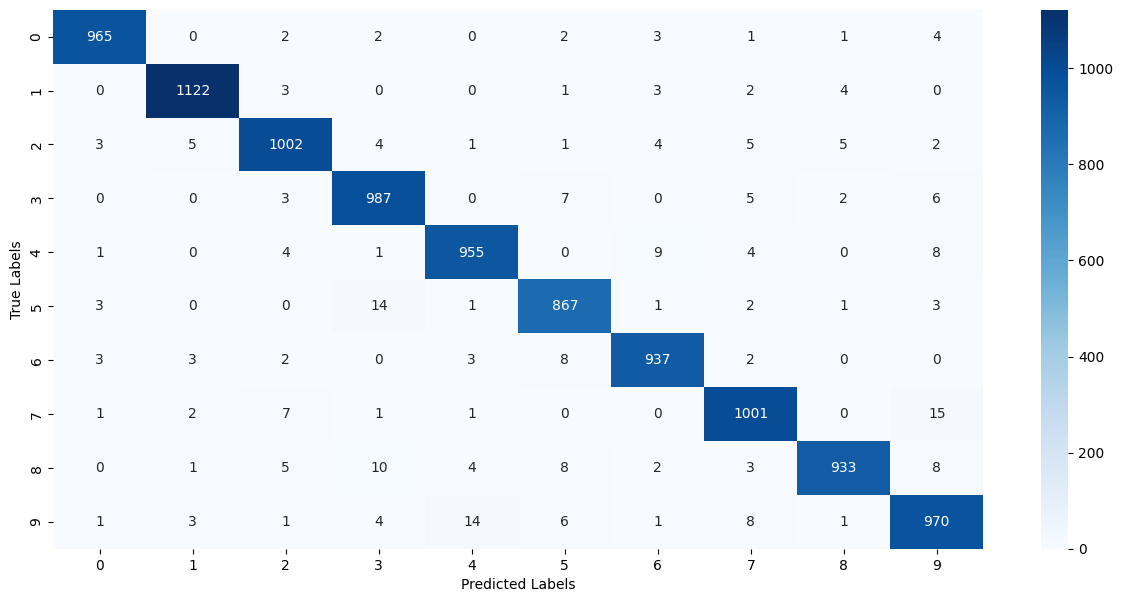

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building the predictive system

In [ ]:
input_image_path='/content/MNIST_digit.png'

input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

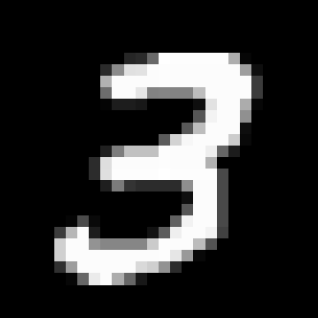

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

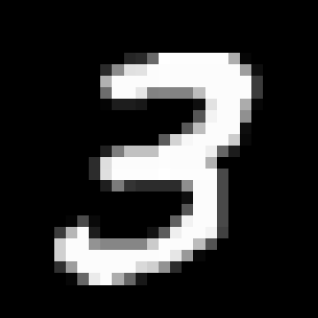

In [ ]:
# convert to greyscale image

greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(greyscale)

In [ ]:
greyscale.shape

(318, 318)

In [ ]:
input_image_resize=cv2.resize(greyscale,(28,28))
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[6.3340576e-07 1.2403496e-03 3.2849803e-03 1.0000000e+00 2.3657921e-11
  7.8825814e-01 3.0459202e-17 4.1983280e-02 5.4914939e-01 9.9992865e-01]]


In [ ]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3
